### Project: No Show Appointments Data¶
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#Model">Model Building</a></li>
</ul>


<a id='intro'></a>
## Introduction
- The selected dataset is the No show appointments dataset which contains data on patients appointment at the hospital and variables that might have influenced why these patients show up for their medical appointments or not
- The data also contains variables that can potentially be used to predict whether a patient will be present for an appointment or otherwise
- The dependent variable is the no-show column and will be analyzed in relation with other columns


## QUESTIONS
1. which gender shows up for their medical appointments more: Males or Females
2. Does the difference between the scheduled day and appointment day influence if a patient will show up for their appointment or Not?
3. Does receiving SMS messages bring about more attendance to medical appointments? 
4. Which age range come for their appointments the most?
- Younger people(<=40years)?
- Older people(>40years)?


importing the neccesary packages for my analysis

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#import ML packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV

import pickle
import requests
import json

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will load the data and check for the structure and properties of the data


### General Properties

loading and performing initial inspection of data

In [43]:
df= pd.read_csv('noshowappointments.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [44]:
#checking the tail to have a more comprehensive view of the dateset
df.tail(10)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [45]:
df.shape

(110527, 14)

checking for the data types and null values

In [46]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [47]:
#checking for the statistical properties of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


checking for duplicate values

In [48]:
sum(df.duplicated())

0

## findings so far
- The table has 110527 rows of data and 12 columns
- There is no duplicate or null values
- There are some columns that are not properly formatted

### Data Cleaning 


The dataset has no null or duplicate values. However,
- the patientId and AppointmentId are not useful for my analysis so I will remove them
- the casing of the column headers are not consistent so I will convert them to lowercase
- some columns are not correctly spelt and will be renamed
- the dates are not properly formatted
- the no-show and the gender columns will be converted to binary for easier analysis

In [49]:
#removing columns that are not important to my analysis
df.drop(columns= ['PatientId', 'AppointmentID'], inplace= True)

### converting scheduledday and appointmentday to datetime format and also removing the times at the back as they offer  no significant value to the analysis

In [50]:
df['ScheduledDay']= df['ScheduledDay'].str.split('T', n=0, expand = True).astype('str')
df['AppointmentDay']= df['AppointmentDay'].str.split('T', n=0, expand = True).astype('str')
df['ScheduledDay']= df['ScheduledDay'].str.split('T', n=0, expand = True).astype('datetime64[ns]')
df['AppointmentDay']= df['AppointmentDay'].str.split('T', n=0, expand = True).astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Gender          110527 non-null  object        
 1   ScheduledDay    110527 non-null  datetime64[ns]
 2   AppointmentDay  110527 non-null  datetime64[ns]
 3   Age             110527 non-null  int64         
 4   Neighbourhood   110527 non-null  object        
 5   Scholarship     110527 non-null  int64         
 6   Hipertension    110527 non-null  int64         
 7   Diabetes        110527 non-null  int64         
 8   Alcoholism      110527 non-null  int64         
 9   Handcap         110527 non-null  int64         
 10  SMS_received    110527 non-null  int64         
 11  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


In [51]:
#converting all headers to lowercase to make it easier to work with my data and ensure some level of consistency
df.columns= df.columns.str.lower()
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


- renaming columns that are not correctly spelt: hipertension and handcap 
- no-show column will also be changed to present as it is more convenient 

In [52]:

df.rename(columns= {'hipertension': 'hypertension', 'handcap': 'handicap', 'no-show': 'present'}, inplace=True)
df.head(1)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [53]:
# converting the present column to binary to aide better manipulation of data.
# 1 implies Yes meaning the patient was present
# while 0 implies No that is the patient was absent for the appointment
df['present'].replace('No',0, inplace=True)
df['present'].replace('Yes',1, inplace=True)
df['present'].value_counts()

0    88208
1    22319
Name: present, dtype: int64

In [54]:

#The age contains negative values which are less than 1 years old.
#I will replace the negative age values to 0 using the numpy.where function 
df['age']= np.where(df['age']<1, 0,df['age'])
df['age'].value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

Checking the statistical properties of the table

In [55]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


My data is now clean enough for me to begin my exploratory data analysis


<a id='eda'></a>
## Exploratory Data Analysis

- Exploring my data to answer questions already specified above
- The no show column is being compared against the other variables


Exploring the correlation between the different variables in the data


<AxesSubplot:>

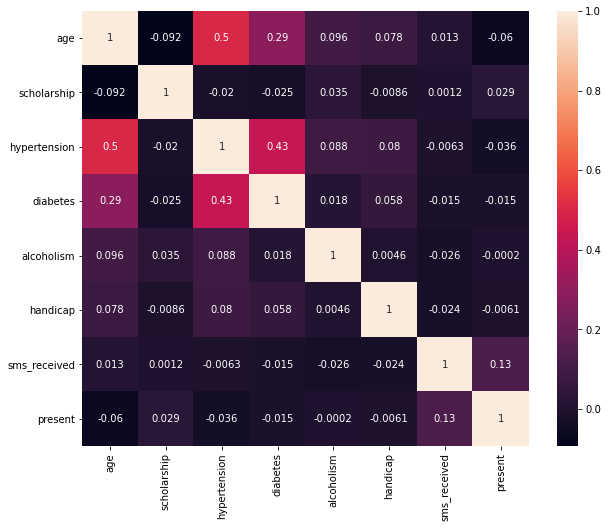

In [56]:
plt.figure(figsize= (10,8))
sns.heatmap(df.corr(), annot=True)

The dependent varible which is the present column has a negative correlation to most of the other columns except the scholarship and the sms_received columns

### Research Question 1: (which gender shows up for their medical appointments more: Males or Females?)
- This is important because it is generally because Females are believed to pay more attention to their health in comparison to males. Answering this question will either verify or disprove this claim and help the government to decide how to better channel health education

In [57]:
df['gender'].value_counts()

F    71840
M    38687
Name: gender, dtype: int64

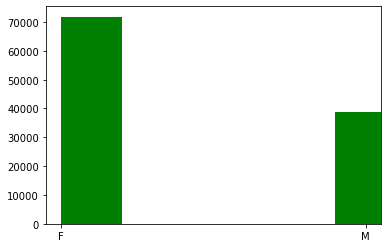

In [58]:
#creating a function called plotter that returns a chart 
def plotter(col):
    plt.hist(col,width=0.2, color='g')
plotter(df['gender'])

Using the value counts method which provides the count for each unique value in the column, It was discovered more females were scheduled for medical appointment in comparison to males

In [59]:
df['present'].value_counts()

0    88208
1    22319
Name: present, dtype: int64

finding the rate of attendance for each gender using the groupby and value_counts functions
This is then represented with a chart to describe the correlation diagrammatically

In [60]:
df.groupby('gender')['present'].value_counts()

gender  present
F       0          57246
        1          14594
M       0          30962
        1           7725
Name: present, dtype: int64

gender  present
F       0          51.793679
        1          13.204013
M       0          28.013065
        1           6.989242
Name: present, dtype: float64

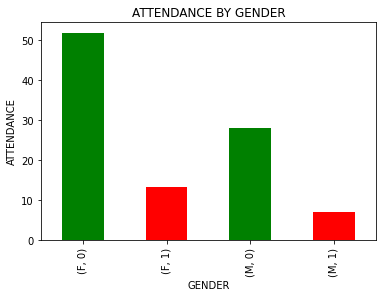

In [61]:
(df.groupby('gender')['present'].value_counts()*100/110527).plot(kind='bar', color=['g','r'])
plt.xlabel('GENDER')
plt.ylabel('ATTENDANCE')
plt.title("ATTENDANCE BY GENDER");
df.groupby('gender')['present'].value_counts()*100/110527

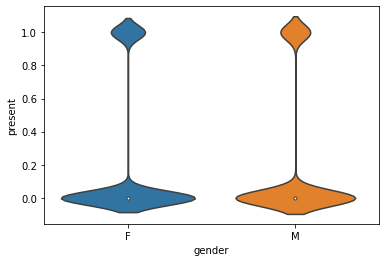

In [62]:
x= df['gender']
y=df['present']
sns.violinplot(x,y, data=df);

## Insights
- By the use of groupby and value_counts, It was found that about 71840 Female patients and 38687 males were scheduled for medical appointments
- consequently, more females were present for medical appointments with 14594 attendees and 7725 male attendees
- By calculating the percentage of total, a higher percentage of female patients showed up for medical appointments compared to males with  14594(13.2% of total)females and 7720(6% of total)males attending their appointments
- Also, based on the chart above, the attendance of females is much higher as demonstrated by the red bar 
- By the violinplot, there are more absentees for both gender

### Research Question 2: Does the difference between the scheduled day and appointment day influence if a patient will show up for their appointment or Not?
- Perhaps, some patients did not have enough time to plan their time in line with the appointment
- A short duration between scheduling day and the appointment date can reduce the likelihood of patients coming for their appointments due to occupation with other engagements and logistics about getting to the clinic

In [63]:
#creating a new column from difference between the scheduled day and the day of appointment
#this is to obtain the date differences and see if it had an effect on attendance or not
df['datedif']= (df['appointmentday']-df['scheduledday']).dt.days
df.head(5)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present,datedif
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


10.183701719941734

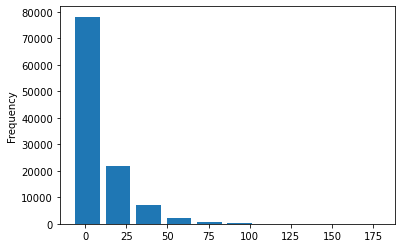

In [64]:
df['datedif'].plot(kind='hist', width= 15)
df['datedif'].mean()

- mean date difference between appointmentday and scheduleday is about 10days
- most patients had less than 10 days between their appointment day and scheduled day
- The patients with relatively short duration between their appointments and those with and those with longer duration between their appointments and scheduled day will be determined. 

In [65]:
short_duration= df.query('datedif<10.18')
long_duration= df.query('datedif>=10.18')

mean_ duration which represent the mean attendance of patients with short duration between their appointments and those with shorter duration is obtained and is then visualized

In [66]:
mean_attendance_low= short_duration['present'].mean()
mean_attendance_high= long_duration['present'].mean()

(0.1461468697835202, 0.3251466062822969)

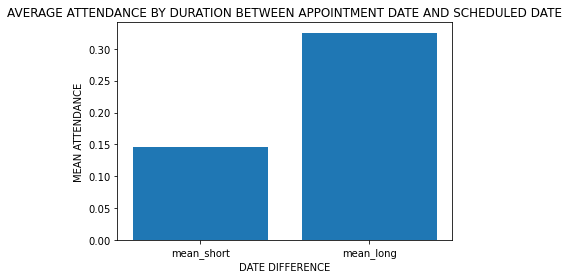

In [67]:
#visualizing the average attendance by duration
locations=[1,2]
heights=[mean_attendance_low, mean_attendance_high]
labels= ['mean_short', 'mean_long']
plt.bar(locations, heights, tick_label= labels)
plt.title('AVERAGE ATTENDANCE BY DURATION BETWEEN APPOINTMENT DATE AND SCHEDULED DATE')
plt.ylabel('MEAN ATTENDANCE')
plt.xlabel('DATE DIFFERENCE');
mean_attendance_low, mean_attendance_high

Text(0.5, 1.0, 'ATTENDANCE BY DATE DIFFERENCE')

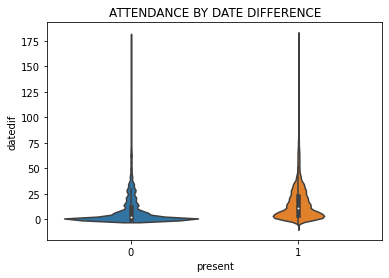

In [68]:
sns.violinplot(x= 'present', y= 'datedif', data= df)
plt.title('ATTENDANCE BY DATE DIFFERENCE')


## Insights
- The mean date duration was about 10days
- Those with shorter duration between their appointments could not attend their appointment. perhaps because they didn't have enough time to plan
- In contrast, those with longer duration recorded a much higher rate or attendance as seen by the bar chart above for mean short and mean long durations 
- Based on the blue and orange violins, more people that were present had a longer time between their scheduling day and appointmentday

## Research Question 3: Which age range come for their appointments the most?
- Younger people(<40years)? or Older people(>40years)?
- The age bracket that attends their medical appointments the most can provide insights into why their is low attendance and possible age-related factors that might be responsible for it
- This can aid awareness programs and it can be targeted more towards the age group that is lagging

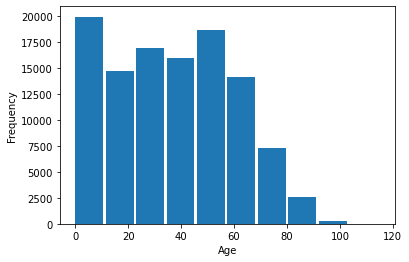

In [69]:
df['age'].plot(kind= 'hist', width=10.5)
plt.xlabel('Age');


Age distribution of patients is non linear but the least number of patients fall around age 90-100 and most fall around age 0-10

,mean,std
present,,
0,37.790076,23.338860
1,34.317667,21.965941


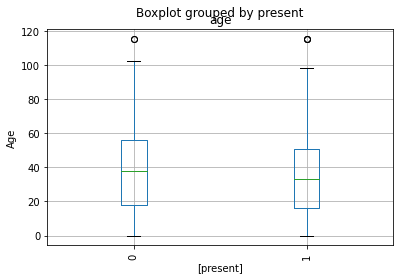

In [70]:
df.boxplot(column=['age'], by= ['present'], rot= 90)
plt.ylabel('Age')
df.groupby(['present'])['age'].describe().loc[:, ['mean', 'std']]


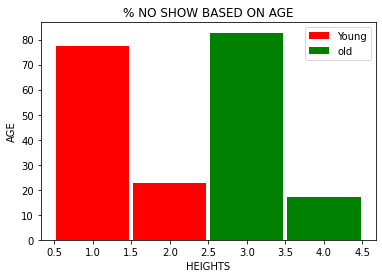

In [71]:
#Taking age 40 as the middle age between the young and the old
young= df.query('age<=40')['present'].value_counts()*100/60684
old= df.query('age>40')['present'].value_counts()*100/49843
young, old

plt.bar([1,2],young, width=0.95, label= 'Young', color='r' )
plt.bar([3,4],old, width=0.95, label= 'old', color='g' )
plt.legend()
plt.xlabel('HEIGHTS')
plt.ylabel('AGE')
plt.title('% NO SHOW BASED ON AGE');


### Insights:
- Age distribution of patients is non linear but the least number of patients fall around age 90-100 and most fall around age 0-10
- the mean age for most present was around 34.3 while absent was around 37. this is shown by the boxplot above
- More young people were scheduled for appointments
- Based on the bar chart above, A higher percentage of young people(<=40years, red bar) showed up for their medical appointments(22.6%) while only 17.25% percent of old people(>40years, green bar)

### Research Question 4. Does receiving SMS messages bring about more attendance to medical appointments?
- SMS messages may serve as a reminder and help patients keep tabs of the dates of their appointment. 
#checking for the number of patients that showed uo for their appointments based on sms_recieved


0    75045
1    35482
Name: sms_received, dtype: int64

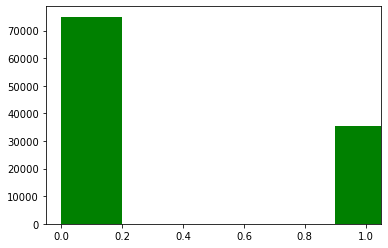

In [72]:
plotter(df['sms_received']);
df['sms_received'].value_counts()

Most patients did not receive SMS messages as shown by the plot above with only 35482 receiving SMS messages and 75482 not receiving SMS messages

sms_received  present
0             0          62510
              1          12535
1             0          25698
              1           9784
Name: present, dtype: int64

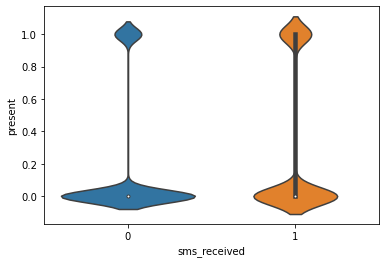

In [73]:
x=df['sms_received']
y=df['present']
sns.violinplot(x,y)
df.groupby('sms_received')['present'].value_counts()

In [74]:
no_sms= df.query('sms_received==0')
sms= df.query('sms_received==1')

no_sms_mean= no_sms['present'].mean()
sms_mean= sms['present'].mean()
sms_mean, no_sms_mean

(0.27574544839637, 0.16703311346525418)

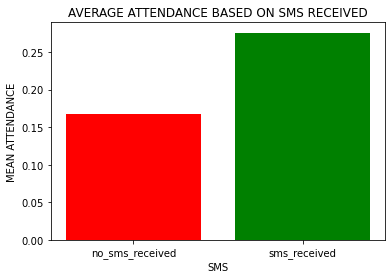

In [75]:
locations=[1,2]
heights=[no_sms_mean, sms_mean]
labels= ['no_sms_received', 'sms_received']
plt.bar(locations, heights, tick_label= labels, color= ['r','g'])
plt.title('AVERAGE ATTENDANCE BASED ON SMS RECEIVED')
plt.ylabel('MEAN ATTENDANCE')
plt.xlabel('SMS');

## Insights
- mean attendance for SMS recepients is 0.27574544839637 while mean attendance for none sms recepients is 0.16703311346525418
- 74863 patients did not received sms messages. out of these, only 12535 showed up for their appointments while 62510 did not
- According to the bar chart, patients that received sms messages recorded a higher mean attendance compared to those that did not
- The violinplot also shows that those that received SMS tends to show up for their appointments


<a id='conclusions'></a>
## Conclusions
- majority of patients did not show up for their appointments. There are various factors that might have contributed to this:
- Most patients that were scheduled for medical appointments are females and a higher percentage of these females showed up for their appointments compared to males
- A high difference between date of appointment and scheduled date showed higher attendance compared to low difference.
- SMS seems to encourage attendance perhaps because it reminds patients about their appointments
- More young people showed up for their medical appointments

<a id='Model'></a>
## Model Building

Preparing the data by dropping columns and encoding columns

In [76]:
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,present,datedif
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0


In [77]:
#creating a copy of the dataset to be used for modeling
df_copy = df.copy()

In [78]:
#dropping the scheduled_day and appointment day columns as the datedif feature will be more valuable to the model. the reason is that the data was recorded for a single year, over just 4 months.
df_copy.drop(['scheduledday', 'appointmentday'], axis=1, inplace=True)

In [79]:
#encoding the neighborhood column
df_copy['neighbourhood']= df_copy['neighbourhood'].astype('category')
df_copy["neighbourhood"]= df_copy['neighbourhood'].cat.codes

In [80]:
# encoding the gender column to category using the one hot encoding to make it useable in the algorithm
df_copy['gender']= df_copy['gender'].astype('category')
df_copy["gender"]= df_copy['gender'].cat.codes
df_copy['gender'].value_counts()

0    71840
1    38687
Name: gender, dtype: int64

In [81]:
#declaring the dependent and independent variables
x=df_copy.drop('present', axis= 1)
y= df_copy['present']

In [82]:
#splitting dataset into test and train
x_train, x_val, y_train,y_val= train_test_split(x,y, train_size=0.75)

In [83]:
#trying different algorithms to chose the most suitable one for the dataset based on accuracy
# 
models=[]
results=[]
names=[]

scoring='roc_auc'

#append algorithms and names to list
models.append(('RF',RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('GB', GaussianNB()))

#iterate over algorithms
for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_score=cross_val_score(model, x_train, y_train, scoring= scoring, cv=kfold)
    results.append(cv_score)
    names.append(name)
    
    print(f"{name}: {cv_score.mean()}, {cv_score.std()}")

RF: 0.7039082255653181, 0.004698901127535046
DT: 0.5784524353513953, 0.005115880981614371
LR: 0.6605717585431258, 0.00454623029252516
GB: 0.6362686701915174, 0.0027951443444459174


In [84]:
# the accuracy is very low and the model needs to be enhanced
# I will now use Imblearn to balance the dataset
from imblearn.over_sampling import SMOTE

In [85]:
sm= SMOTE(random_state=True)

In [86]:
x_res,y_res=sm.fit_resample(x, y)

In [87]:
x_train,x_test, y_train, y_test= train_test_split(x_res, y_res, test_size=0.15, random_state= 101)

In [88]:
print(f"The shape of x_train and y_train before resampling was {x_train.shape} and {y_train.shape} \
respectively while theshape of x_train and y_train after resampling was{x_res.shape} and {y_res.shape}")

The shape of x_train and y_train before resampling was (149953, 10) and (149953,) respectively while theshape of x_train and y_train after resampling was(176416, 10) and (176416,)


In [89]:
models=[]
results=[]
names=[]

scoring='roc_auc'

#append algorithms and names to list
models.append(('RF',RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('GB', GaussianNB()))

#iterate over algorithms
for name, model in models:
    kfold = KFold(n_splits=10, random_state=101, shuffle=True)
    cv_score=cross_val_score(model, x_train, y_train, scoring= scoring, cv=kfold)
    results.append(cv_score)
    names.append(name)
    
    print(f"{name}: {cv_score.mean()}, {cv_score.std()}")


RF: 0.8685664344162554, 0.0018787177331925577
DT: 0.7839541793679505, 0.003152766254698611
LR: 0.687351331761613, 0.003434598031986572
GB: 0.6678658231642759, 0.004035995765473723


Random forest showed the best performing algorithm and will thus be used to train the model

In [90]:
rf=RandomForestClassifier()

In [91]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [92]:
pred=rf.predict(x_test)

In [93]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78     12321
           1       0.83      0.77      0.80     14142

    accuracy                           0.79     26463
   macro avg       0.79      0.79      0.79     26463
weighted avg       0.79      0.79      0.79     26463



In [94]:
print(confusion_matrix(pred, y_test))

[[10020  2301]
 [ 3216 10926]]


In [95]:
print(round(accuracy_score(pred, y_test)*100, 2))

79.15


In [96]:
# Loading the model into a pickle file to serialize it for deployment
pickle.dump(rf, open('model.pkl', 'wb'))

### Final Conclusion
- model has been built and serialized into a pickle file and so can be further deployed using flask, streamlit, etc(might come back to this later)
- The insights generated can also be used to make decisions and drive business forward
- The accuracy score is 79.15% which can undoubtedly be improved but will still do for now